<a href="https://colab.research.google.com/github/victorijsn/imersaodados3/blob/main/20210506_Aula04_Victor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Respostas aos desafios da aula 04 - ImersaoDados - Alura
Victor Nunes Toscano

Linkedin: https://www.linkedin.com/in/vntoscano/

Data: 06/05/2021

## Contexto

- Visualizando os dados

## Desafios:
1. Desafio 01: Encontrar o top 10, das ações do MOA (inibidor, agonista...)
2. Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle
3. Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72
4. Desafio 04: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
5. Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)
6. Desafio 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA
7. Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes
8. Desafio 08: Resumo do que você aprendeu com os dados


Importar a biblioteca [pandas](https://pandas.pydata.org/docs/index.html), a base de dados, as bliblitecas de gráficos e algumas adequações.

In [ ]:
# Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Config dos plots
sns.set()

In [ ]:
# Importar os dados
dados_experimentos = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true', compression = 'zip')
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')

In [ ]:
# Ajustes nos nomes das variáveis
mapa = {'droga': 'composto'}
dados_experimentos.rename(columns=mapa, inplace=True)
dados_experimentos.columns = dados_experimentos.columns.str.replace('-','_')
dados_experimentos['media_genes'] = dados_expr_result.loc[:,'g_0':'g_771'].mean(axis=1)
dados_experimentos['media_celulas'] = dados_expr_result.loc[:,'c_0':'c_99'].mean(axis=1)

In [ ]:
# Visualizar as 5 primeiras linhas da base de experimento
dados_experimentos.head()

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_60,c_61,c_62,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
# Visualizar as 5 primeiras linhas da base de resultados
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


A base de dados de resultados está dividida por colunas e em cada coluna temos os componentes investigados e no sufixo do nome da coluna temos a ação do composto. A partir da segunda coluna temos dummies (valores binários de 0 e 1) onde 0 significa que o composto **não** teve ação na molécula ou proteína testada e 1 que houve ação na molécula ou proteína testada.

Ações possíveis são:
1. **Agonista:** que potencializa a ação da molécula (ou outro componente);
2. **Antagonista:** que diminui a ação da molécula (ou outro componente);
3. **Inibidor:** que inibe a ação da molécula (ou outro componente);
4. **Ativador:** que ativa a ação da molécula (ou outro componente);
5. entre outras.


### Resposta 01
#### Encontrar o top 10, das ações do MOA (inibidor, agonista...)



In [ ]:
# Contar os resultados alcançados nos experimentos
contagem_moa = dados_resultados.drop(['id'], axis=1).sum().sort_values(ascending=False)
contagem_moa[:5]

nfkb_inhibitor                   832
proteasome_inhibitor             726
cyclooxygenase_inhibitor         435
dopamine_receptor_antagonist     424
serotonin_receptor_antagonist    404
dtype: int64

In [ ]:
# Arruma a base com os sufixos dos componentes testados
acao = [i.split('_')[-1] for i in contagem_moa.index] #for para cada linha de índice
base_acao = contagem_moa.reset_index()
base_acao['acao'] = acao # juntei as ações do medicamentos na tabela
mapa = {'index':'moa',0: 'n','acao':'acao'} 
base_acao.rename(columns=mapa, inplace=True) #renomeio as colunas
base_acao[['acao','n']].groupby(by=['acao']).sum()['n'].sort_values(ascending=False)[:10] #plot do resultado

acao
inhibitor            9693
antagonist           3449
agonist              2330
blocker               323
agent                 150
activator             115
local                  80
immunosuppressant      73
anti-inflammatory      73
antioxidant            73
Name: n, dtype: int64

### Resposta 02
#### Criar a coluna eh_controle para quando na linha tratamento == com_controle

Utilizo a base de experimentos para identificar quais são controles.


In [ ]:
mapa={'com_controle':1, 'com_droga':0}
dados_experimentos['eh_controle'] = dados_experimentos['tratamento'].map(mapa)
dados_experimentos.tail()

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_61,c_62,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,eh_controle
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680,0
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,0
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,1
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740,0
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520,0


### Resposta 03
#### Criar três colunas para indicar o tempo 24, 48, 72
Usar a função get_dummies para gerar as variáveis binárias.

In [ ]:
# Dummies de tempo
dummies_tempo = pd.get_dummies(dados_experimentos['tempo'])
dados_experimentos = pd.concat([dados_experimentos,dummies_tempo], axis=1) # função concatenar
dados_experimentos.head()

,id,tratamento,tempo,dose,composto,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,eh_controle,24,48,72
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,1,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,0,1
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,0,1


### Resposta 04
#### Estudar sobre [combinações de Datas Frames](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

Existem 4 formas de combinar os dados através do Pandas. 
1. Com base na documentação, temos a função ```concat``` que acrescenta colunas a uma base de dados.
2. A segunda função é a ```append``` que acrescenta linhas a uma base de dados.
3. Por fim a função ```merge``` que possui diversos tipos e combina duas bases através de uma ou mais variáveis que servem de índice. Além disso, existem tipos de combinações que preservam ou descartam dados. Por exemplo, o caso o argumento ```how='inner'```, a função irá preservar os dados que são **comuns** às duas bases de dados.
4. São 4 tipos de *joins* (ou junções). Para entender melhor, suponha duas bases de dados *x* e *y*:
- **left** - Mantêm os dados da base da esquerda (*x*), para combinar os dados;
- **right** - Mantêm os dados da base da direita (*y*), para combinar os dados;
- **outer** - Une os dados de ambas as bases comparadas e também é conhecida com *full join*;
- **inner** - Mantêm os dados que são comuns às duas bases de dados.




In [ ]:
# Reproduzir o merge feito em aula para realizar a análise do desafio 5.
dados_resultados['n_moa'] = dados_resultados.drop(['id'], axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa']!=0)
dados_expr_result = pd.merge(dados_experimentos, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_expr_result.head()

In [ ]:
# Verificar se os resultados batem com o da aula - dados de tratamento
dados_expr_result.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

In [ ]:
# Verificar se os resultados batem com o da aula - dados de controle
dados_expr_result.query('tratamento == "com_controle"' )['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

### Resposta 05
#### Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)

Listar os compostos mais recorrentes, depois do que utilizado utilizadas como controle.

In [ ]:
dados_expr_result['composto'].value_counts()[:5]

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
Name: composto, dtype: int64

Utilizando, iremos comparar os resultados de dois compostos 87d714366 e o composto de controle cacb2b860.

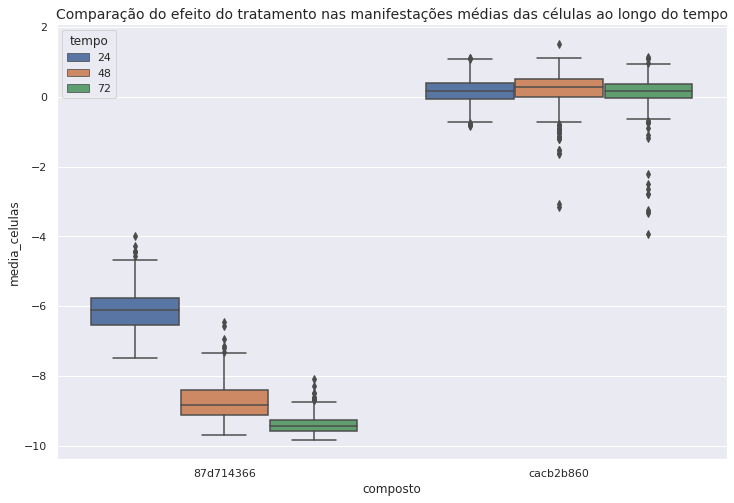

In [ ]:
composto_principal = dados_expr_result['composto'].value_counts().index[:2]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_expr_result.query('composto in @composto_principal'), y= 'media_celulas', x='composto', hue='tempo')
plt.title('Comparação do efeito do tratamento nas manifestações médias das células ao longo do tempo',fontsize = 14)
plt.show()

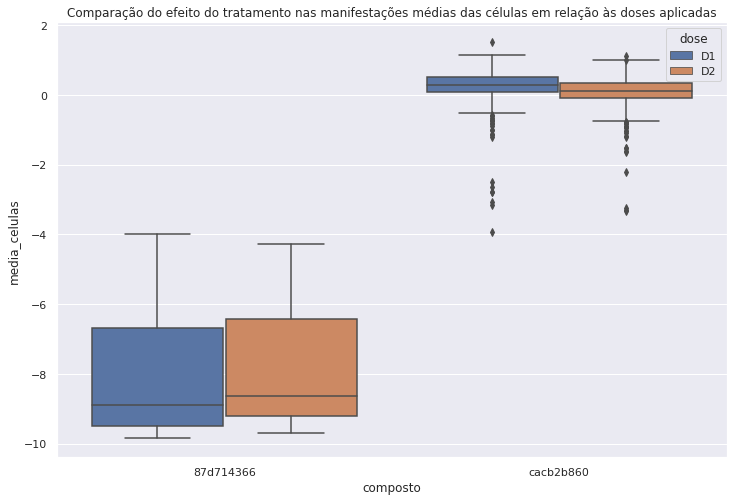

In [ ]:
composto_principal = dados_expr_result['composto'].value_counts().index[:2]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_expr_result.query('composto in @composto_principal'), y= 'media_celulas', x='composto', hue='dose')
plt.title('Comparação do efeito do tratamento nas manifestações médias das células em relação às doses aplicadas',fontsize = 12)
plt.show()

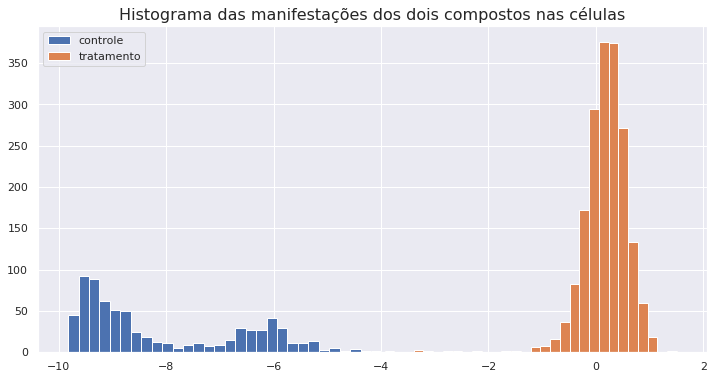

In [ ]:
# histograma das manifestações dos dois componentes selecionados
dados_comp_princ = dados_expr_result.query('composto in @composto_principal')
plt.figure(figsize=(12,6))
plt.hist(dados_comp_princ.query('tratamento=="com_droga"')['media_celulas'], bins=30)
plt.hist(dados_comp_princ.query('tratamento=="com_controle"')['media_celulas'], bins=30)
plt.legend({'tratamento','controle'})
plt.title("Histograma das manifestações dos dois compostos nas células", fontsize = 16)
plt.show()

### Resposta 06
#### Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA

In [ ]:
# Não consegui desenvolver o desafio.

### Resposta 07
#### Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

In [ ]:
# Não consegui desenvolver o desafio.

### Resposta 08
#### Resumo do que você aprendeu com os dados

1. Existem diversas formas de ativação do composto que podem modificar os genes ou células. As principais são as inibidoras, antagonistas e agonistas.
2. A combinação de dados é uma poderosa ferramenta para comparar os resultados com os experimentos realizados. Através dessa função é possível verificar o número de ativações e quais ações são mais comuns desses componentes.
3. O tempo parece ser um elemento extremamente importante para a análise, de modo que é possível observar mudanças consideráveis nas células após a administração da droga.
4. Já a dosagem não parece ter diferenças estatisticamente significativas nas manifestações das células.
5. Sobre as ativações, não consegui desenvolver. Não consegui entender o que seria a configuração do experimento.
